In [6]:
# BIBLIOTECAS NECESSÁRIAS AO MODELO DE CLASSIFICAÇÃO
import matplotlib.pyplot as plt
import matplotlib as mpl    
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsRestClassifier


Capitulo 3

# Baixando o conjunto de dados

In [7]:
# Dataset mnist
mnist= fetch_openml('mnist_784',version=1,as_frame=False)
mnist.keys()
display('data','target', 'feature_names', 'DESCR', 'details', 
            'categories', 'url')

'data'

'target'

'feature_names'

'DESCR'

'details'

'categories'

'url'

In [8]:
# conferir os arrays
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

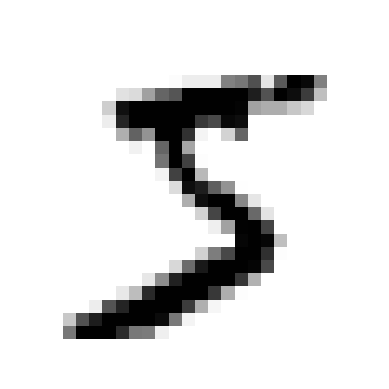

In [10]:
# verificando os imagens
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap ="binary" )
plt.axis("off")
plt.show()

In [11]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [12]:
y = y.astype(np.uint8)

In [13]:
# 3. DIVIDIR EM TREINO E TESTE
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

Treinando um Classificador Binário

In [14]:
y_train_5 = (y_train == 5) # True para todos os 5s, False para todos os outros dígitos
y_test_5 = (y_test == 5)

In [15]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)

# Calculando a Curácia com validação cruzada
Implemetação do modelo 

In [16]:
# INICIALIZAR A LISTA DE ACURÁCIAS 
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
accuracies = []

# Gerar os dados de treino e teste com validação cruzada estratificada
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    
    print(f"Acurácia: {n_correct / len(y_pred):.4f}")
    
print(f"\n{'='*50}")
print(f"Acurácia média: {np.mean(accuracies):.4f}")
print(f"Desvio padrão: {np.std(accuracies):.4f}")
print(f"{'='*50}")

Acurácia: 0.9669
Acurácia: 0.9163
Acurácia: 0.9678

Acurácia média: nan
Desvio padrão: nan


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type

In [17]:
# cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [18]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),), dtype=bool)

In [19]:
# BaseEstimator
# CORRETO ✅
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
                             

array([0.91125, 0.90855, 0.90915])

In [20]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3,
                scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

# Matriz de confusão

In [21]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)

In [22]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [23]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [24]:
# Matriz de confusão
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [25]:
y_train_prefect_predictions = y_train_5  # Perfeitas previsões
confusion_matrix(y_train_5, y_train_prefect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

# Precisão e revocação

In [26]:
# Métricas precision, recall e F1
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [27]:
# recall score
recall_score(y_train_5, y_train_pred)


0.6511713705958311

In [28]:
# F1 score
f1_score(y_train_5, y_train_pred)

0.7325171197343847

Calculando F score

In [29]:
f1_score(y_train_5, y_train_pred)


0.7325171197343847

In [30]:
# chamndo a função decision_function
y_scores = sgd_clf.decision_function([some_digit])
y_scores
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred



array([ True])

In [31]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [32]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [33]:
precision, recall, thresholds = precision_recall_curve(y_train_5, y_scores)

In [34]:
def plot_precision_recall_vs_threshold(precision, recall, thresholds):
    plt.plot(thresholds, precision[:-1], "b--", label="Precision")
    plt.plot(thresholds, recall[:-1], "g-", label="Recall")
    plot_precision_recall_vs_threshold(precision, recall, thresholds)
plt.show()

In [35]:
threshold_90_precision = thresholds[np.argmax(precision >= 0.90)]

In [36]:
y_train_pred_90 = (y_scores >= threshold_90_precision)  

Conferindo a prescião e a revocação com diferentes limiares

In [37]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [38]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

#A calculo da curva ROC 
##Quanto mais distante possivel estiver da linha da curva roc, o classicador fica bom. 
##Esse grafico representa uma taxa de falsos positivos em relaçaõ a taxa de verdadeiros positivos 
##para todos linhares possiveis. 

In [39]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

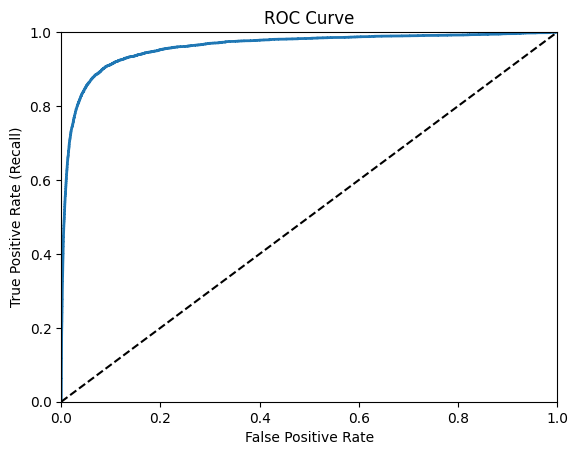

In [40]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # linha diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('ROC Curve')
    if label:
        plt.legend(loc="lower right")   
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
plot_roc_curve(fpr, tpr)
plt.show()



In [41]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

## o resusltado a cima foi bom por ser um dataset menos complicado. 

##Usaremos o RandomForestClassifier

In [58]:
forest_clf = RandomForestClassifier(random_state=42, n_estimators=100)

In [59]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [60]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

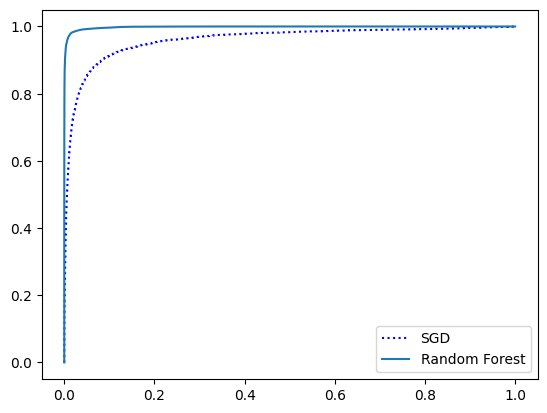

In [61]:
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_forest, tpr_forest, label="Random Forest")
plt.legend(loc="lower right")
plt.show()

##calcular precisão, recall e F1 do RandomForest

In [62]:
# Fazer previsões com o RandomForest
y_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [63]:
# Calcular as métricas
precision_forest = precision_score(y_train_5, y_pred_forest)
recall_forest = recall_score(y_train_5, y_pred_forest)
f1_forest = f1_score(y_train_5, y_pred_forest)


In [64]:
print(f"Precisão: {precision_forest:.4f}")
print(f"Recall: {recall_forest:.4f}")
print(f"F1-Score: {f1_forest:.4f}")

Precisão: 0.9905
Recall: 0.8663
F1-Score: 0.9242


##Comparar com o SGDClassifie

In [65]:
print("="*40)
print("Comparação SGD vs RandomForest")
print("="*40)
print(f"{'Métrica':<12} {'SGD':<10} {'RandomForest':<10}")
print("-"*40)
print(f"{'Precisão':<12} {precision_score(y_train_5, y_train_pred):.4f}     {precision_forest:.4f}")
print(f"{'Recall':<12} {recall_score(y_train_5, y_train_pred):.4f}     {recall_forest:.4f}")
print(f"{'F1-Score':<12} {f1_score(y_train_5, y_train_pred):.4f}     {f1_forest:.4f}")

Comparação SGD vs RandomForest
Métrica      SGD        RandomForest
----------------------------------------
Precisão     0.8371     0.9905
Recall       0.6512     0.8663
F1-Score     0.7325     0.9242


#Classificação Multiclasse- definição entre duas classes 

In [66]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train_5)
svm_clf.predict([some_digit])

array([ True])

In [67]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([1.09884347])

In [68]:
np.argmax(some_digit_scores)

0

In [69]:
svm_clf = SVC()
svm_clf.fit(X_train[:1000], y_train[:1000])  # usa só 1000 amostras pois SVM é lento


SVC()

In [70]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores


array([[ 1.75828215,  2.74956232,  6.13809559,  8.2853702 , -0.28728967,
         9.30119996,  0.74228825,  3.79256174,  7.20847395,  4.85762716]])

In [71]:
[-3.2, -1.5, -0.8, 2.1, -2.0, 8.3, -1.1, -0.5, -3.0, -1.8]
#  0     1     2    3    4     5    6     7     8     9


[-3.2, -1.5, -0.8, 2.1, -2.0, 8.3, -1.1, -0.5, -3.0, -1.8]

In [72]:
svm_clf.classes_[5]

5

In [73]:
ovr_classifier = OneVsRestClassifier(SVC())
ovr_classifier.fit(X_train, y_train)
ovr_classifier.predict([some_digit])

array([5], dtype=uint8)

In [74]:
sgd_clf.decision_function([some_digit])

array([2164.22030239])